In [39]:
# Passo 1: Entendimento do desafio -> Previsão de preços no mercado de vendas de barcos
# Passo 2: Entendimento da área/empresa -> Vendas de barcos
# Passo 3: Extração/obtenção de dados

import pandas as pd

tabela = pd.read_csv("barcos_ref.csv")
display(tabela)

# Passo 4: Ajuste de dados (ETL)
print(tabela.info())


,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


<function matplotlib.pyplot.show(close=None, block=None)>

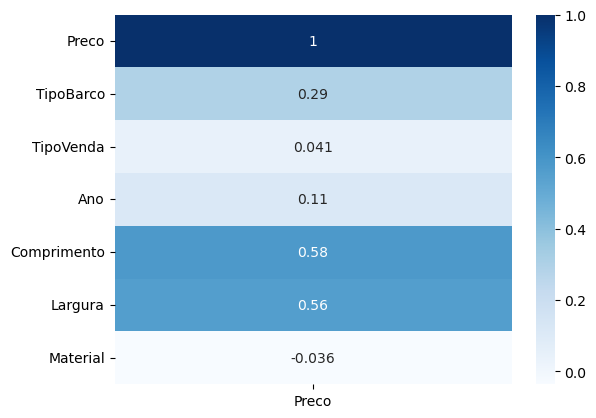

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Passo 5 Análise exploratória
display(tabela.corr()[["Preco"]])

sns.heatmap(tabela.corr()[["Preco"]], cmap="Blues", annot=True)
plt.show




In [41]:
# Passo 6: Modelagem + Algorítmos (IA)

# Separando os dados em x e y (y é o dado da previsão)
y = tabela["Preco"]
x = tabela.drop("Preco", axis=1) # axis=0 eixos das linhas | axis=1 eixo das colunas

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

# Importar a intelgência artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar IA
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinar a IA
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [42]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn. metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.4490324760735813
0.8518516627757357


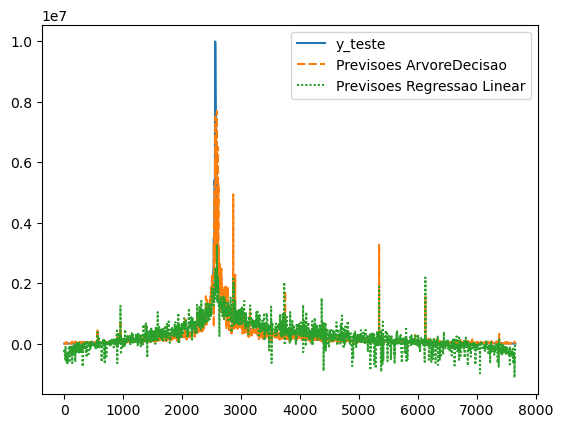

In [43]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

# plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [44]:
# Passo 7: Interpretação de resultados

tabela_nova = pd.read_csv("novos_barcos.csv")
display(tabela_nova)
previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 5860.90766667  9983.85666667 19362.5       ]
